In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)

In [23]:
df = pd.read_csv("forestfires.csv")
df = df.drop(df.columns[[2, 3]], axis=1)
df.area = np.log10(df.area + 1)
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [24]:
df.tail()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0,0.871573
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0,1.742647
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0,1.084934
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0,0.000000
516,6,3,79.5,3.0,106.7,1.1,11.8,31,4.5,0,0.000000


In [47]:
X = df.drop("area", 1)
y = df.area

(517, 10)

# 1 Step by step procedure

In [102]:
print(X[:10])

   X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain
0  7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0
1  7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0
2  7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0
3  8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2
4  8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0
5  8  6  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0
6  8  6  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0
7  8  6  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0
8  8  6  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0
9  7  5  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0


In [56]:
selectkbest = SelectKBest(k=3)
X_new = selectkbest.fit_transform(X, y)

In [61]:
print(X_new[:10])

[[  8.2   6.7   0. ]
 [ 18.    0.9   0. ]
 [ 14.6   1.3   0. ]
 [  8.3   4.    0.2]
 [ 11.4   1.8   0. ]
 [ 22.2   5.4   0. ]
 [ 24.1   3.1   0. ]
 [  8.    2.2   0. ]
 [ 13.1   5.4   0. ]
 [ 22.8   4.    0. ]]


*As we can see, the most important selected features are temperature, wind speed and outside rain. This can be easily interpreted, because the abovementioned factors have a great influence on the level of fire: high temperature and a lack of rain make it more likely to arise, strong wind helps a small spark to move faster and to spread the fire all over the territory.*

# 2 Regularization

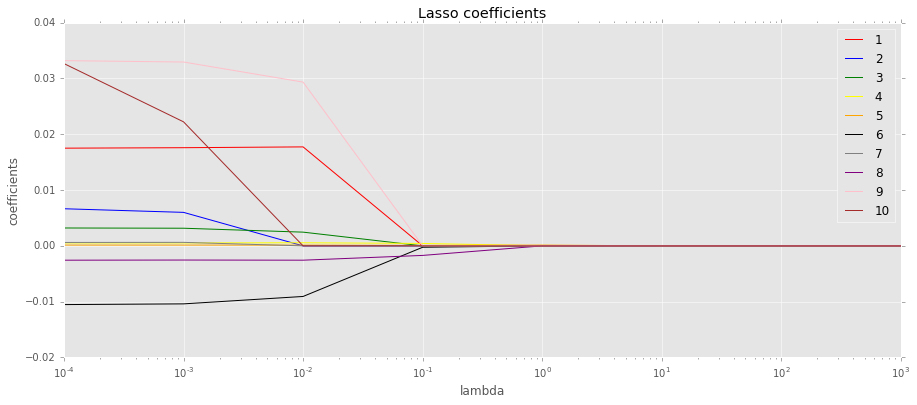

In [101]:
# lambda is determined on a logarithmic scale
lambda_values = 10.0 ** np.arange(-4, 4)

las_coef = []

# constructing regression for each value of the parameter lambda
for l in lambda_values:
    las = Lasso(alpha=l)
    las.fit(X, y)
    las_coef.append(las.coef_)

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'black', 'gray', 'purple', 'pink', 'brown']
plt.title("Lasso coefficients")
plt.xlabel("lambda")
plt.ylabel("coefficients")
# drawing a line for each coefficient of the regression model
for i in range(10):
    plt.plot(lambda_values, np.array(las_coef).T[i], color=colors[i])
plt.xscale('log')
plt.legend(np.arange(1, 11), loc='best')
plt.show()

*As we can see, here the most important selected features are first, ninth and tenth, namely X, wind speed and outside rain. Park construction might be very significant, so this may be a reason why X appeared in this list.*